# Preprocessing .png data

## Contents of this notebook:
<ol>
<li>Set-up</li>
<li>Experimenting with scikit-image (skimage)</li>
<li>Experimenting with Pillow (PIL)</li>
<li>Plotting the histograms of pixel values</li>
<li>Mini assignment: feature scaling images</li> 
<li>Contrast enhancement</li>
<li>A brief note on segmentation</li>
</ol>

## 1. Set-up

For more information, check out [10 Python image manipulation tools](https://opensource.com/article/19/3/python-image-manipulation-tools)

We'll be using a Kaggle dataset: [Pulmonary Chest X-Ray Abnormalities](https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities)

In [1]:
import pandas as pd
import numpy as np

Locate your images

In [2]:
!ls data_png # you can use some Bash commands in Jupyter Notebook, just prefix them with "!"

NLM-ChinaCXRSet-ReadMe.docx chest_xrays_pngs


In [3]:
!ls data_png/chest_xrays_pngs/*png

data_png/chest_xrays_pngs/CHNCXR_0001_0.png
data_png/chest_xrays_pngs/CHNCXR_0002_0.png
data_png/chest_xrays_pngs/CHNCXR_0003_0.png
data_png/chest_xrays_pngs/CHNCXR_0004_0.png
data_png/chest_xrays_pngs/CHNCXR_0005_0.png
data_png/chest_xrays_pngs/CHNCXR_0006_0.png
data_png/chest_xrays_pngs/CHNCXR_0007_0.png
data_png/chest_xrays_pngs/CHNCXR_0008_0.png
data_png/chest_xrays_pngs/CHNCXR_0009_0.png
data_png/chest_xrays_pngs/CHNCXR_0010_0.png
data_png/chest_xrays_pngs/CHNCXR_0653_1.png
data_png/chest_xrays_pngs/CHNCXR_0654_1.png
data_png/chest_xrays_pngs/CHNCXR_0655_1.png
data_png/chest_xrays_pngs/CHNCXR_0656_1.png
data_png/chest_xrays_pngs/CHNCXR_0657_1.png
data_png/chest_xrays_pngs/CHNCXR_0658_1.png
data_png/chest_xrays_pngs/CHNCXR_0659_1.png
data_png/chest_xrays_pngs/CHNCXR_0660_1.png
data_png/chest_xrays_pngs/CHNCXR_0661_1.png
data_png/chest_xrays_pngs/CHNCXR_0662_1.png


## 2. Experimenting with scikit-image (skimage)

In [4]:
from skimage import io
filename = 'data_png/chest_xrays_pngs/CHNCXR_0001_0.png'
img=io.imread(filename) # loads it into a numpy array!

In [5]:
print(f'Img data type: {img.dtype}')
print(f'Img shape: {img.shape}')
print(f'Img min value: {img.min()}')
print(f'Img max value: {img.max()}')
print(f'Img array: {img}')

Img data type: uint8
Img shape: (2919, 3000, 3)
Img min value: 0
Img max value: 255
Img array: [[[59 59 59]
  [48 48 48]
  [39 39 39]
  ...
  [38 38 38]
  [39 39 39]
  [39 39 39]]

 [[59 59 59]
  [49 49 49]
  [41 41 41]
  ...
  [36 36 36]
  [38 38 38]
  [38 38 38]]

 [[60 60 60]
  [49 49 49]
  [45 45 45]
  ...
  [35 35 35]
  [33 33 33]
  [37 37 37]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


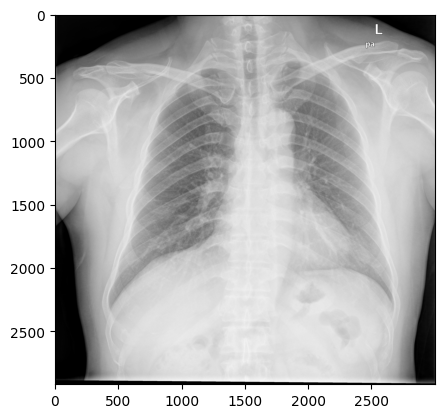

In [6]:
import matplotlib.pyplot as plt  
plt.imshow(img,cmap='gray')

For loop to load & display all of your images

In [7]:
import glob # Python module

images=[]
for file in glob.iglob('data_png/chest_xrays_pngs/*png'):
    img=io.imread(file) 
    images.append(img)

Images is now a list of 20 numpy arrays. 

In [8]:
images_array = np.array(images)

/var/folders/rj/vp_1xm010y5c56w0130rkz580000gn/T/ipykernel_79614/2101175383.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_array = np.array(images)


**Problem:** all of these images have different dimensions! Let's take a closer look: 

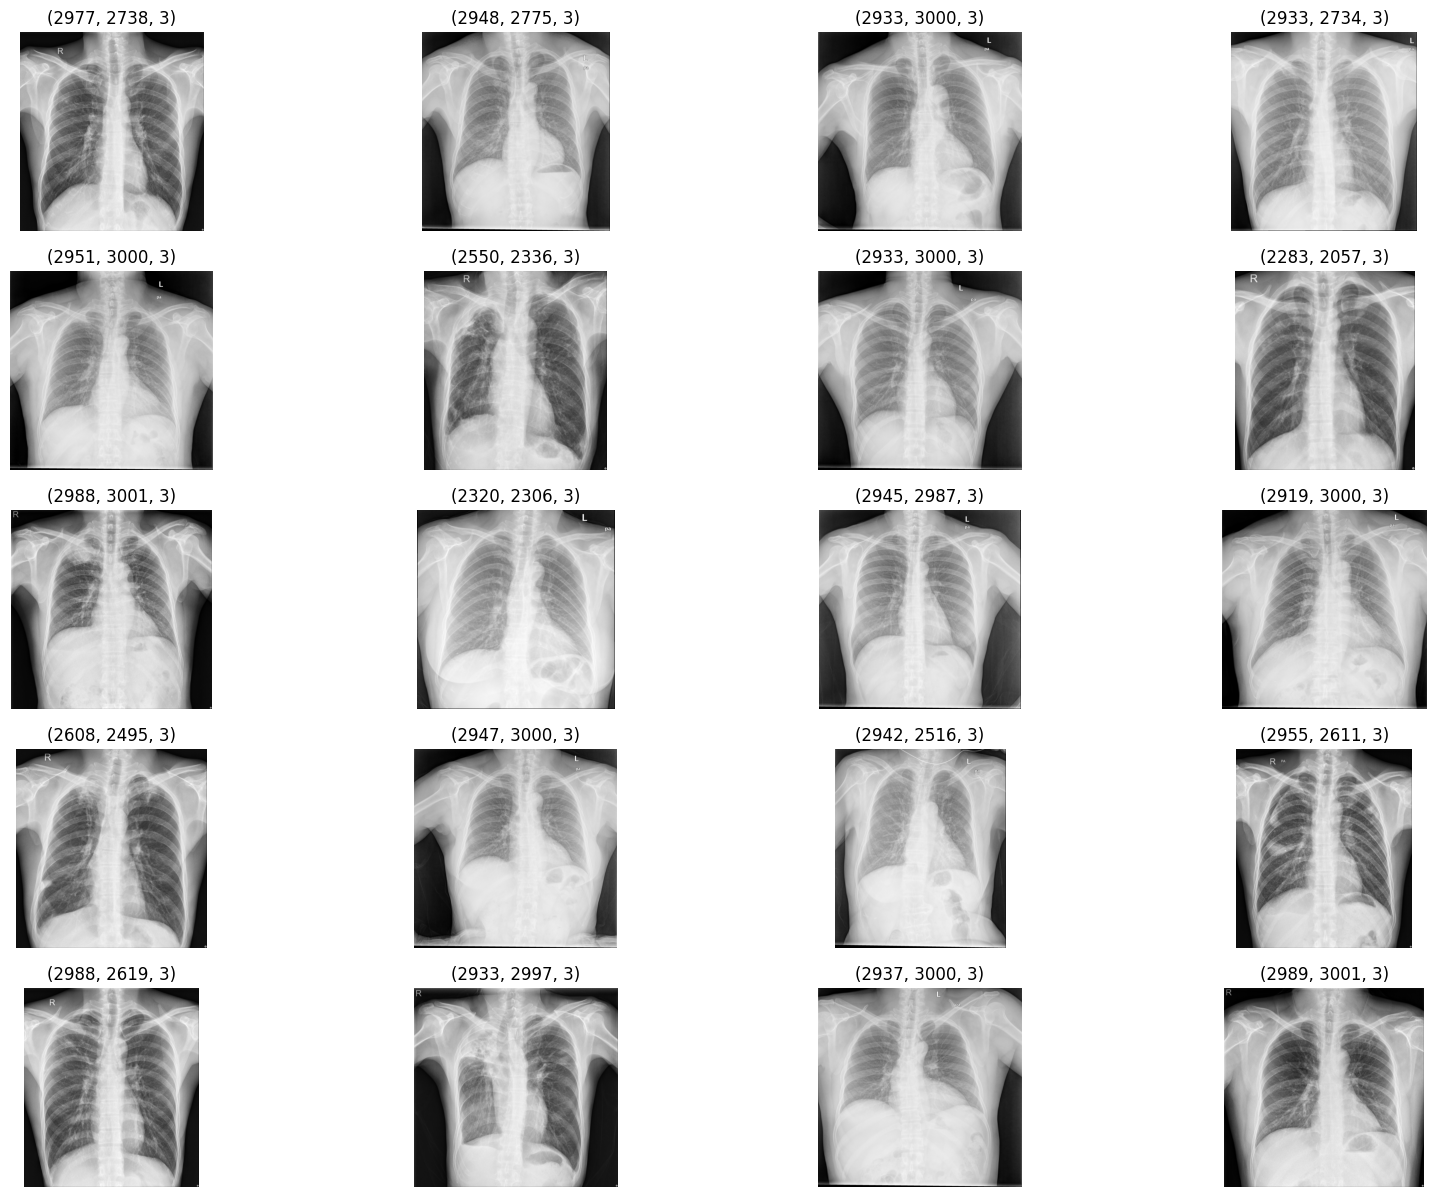

In [9]:
fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img=images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(img.shape) # height x width [x channel]

- It seems as though all of the images with a default **grayscale colour map (colour map often abbreviated to _cmap_)** are 3-tensors, meaning that each pixel has a **R** (red), **G** (green) and **B** (blue) value associated with it. This means that for 1 _N x M_ image, you have 3 _N x M_ matrices and each one is often referred to as a **channel**.
- Normally, an image with 3 channels would be a colour image. A _N x M_ black & white image usually only has 1 channel. Each entry of the _N x M_ matrix corresponds to 1 grayscale value per pixel.
- Note that here, the default colour map of the 1-tensor images is actually the viridis _cmap_ (yellow to dark purple), which is unexpected. This is a great example of why you should always check the dimensions of the image array, and never trust your naked eye alone!

In [10]:
from skimage.color import rgb2gray

images_adjusted = []
for i in range(20):
    img = images[i]
    if len(img.shape) != 2: grayscale=rgb2gray(img)
    images_adjusted.append(grayscale)

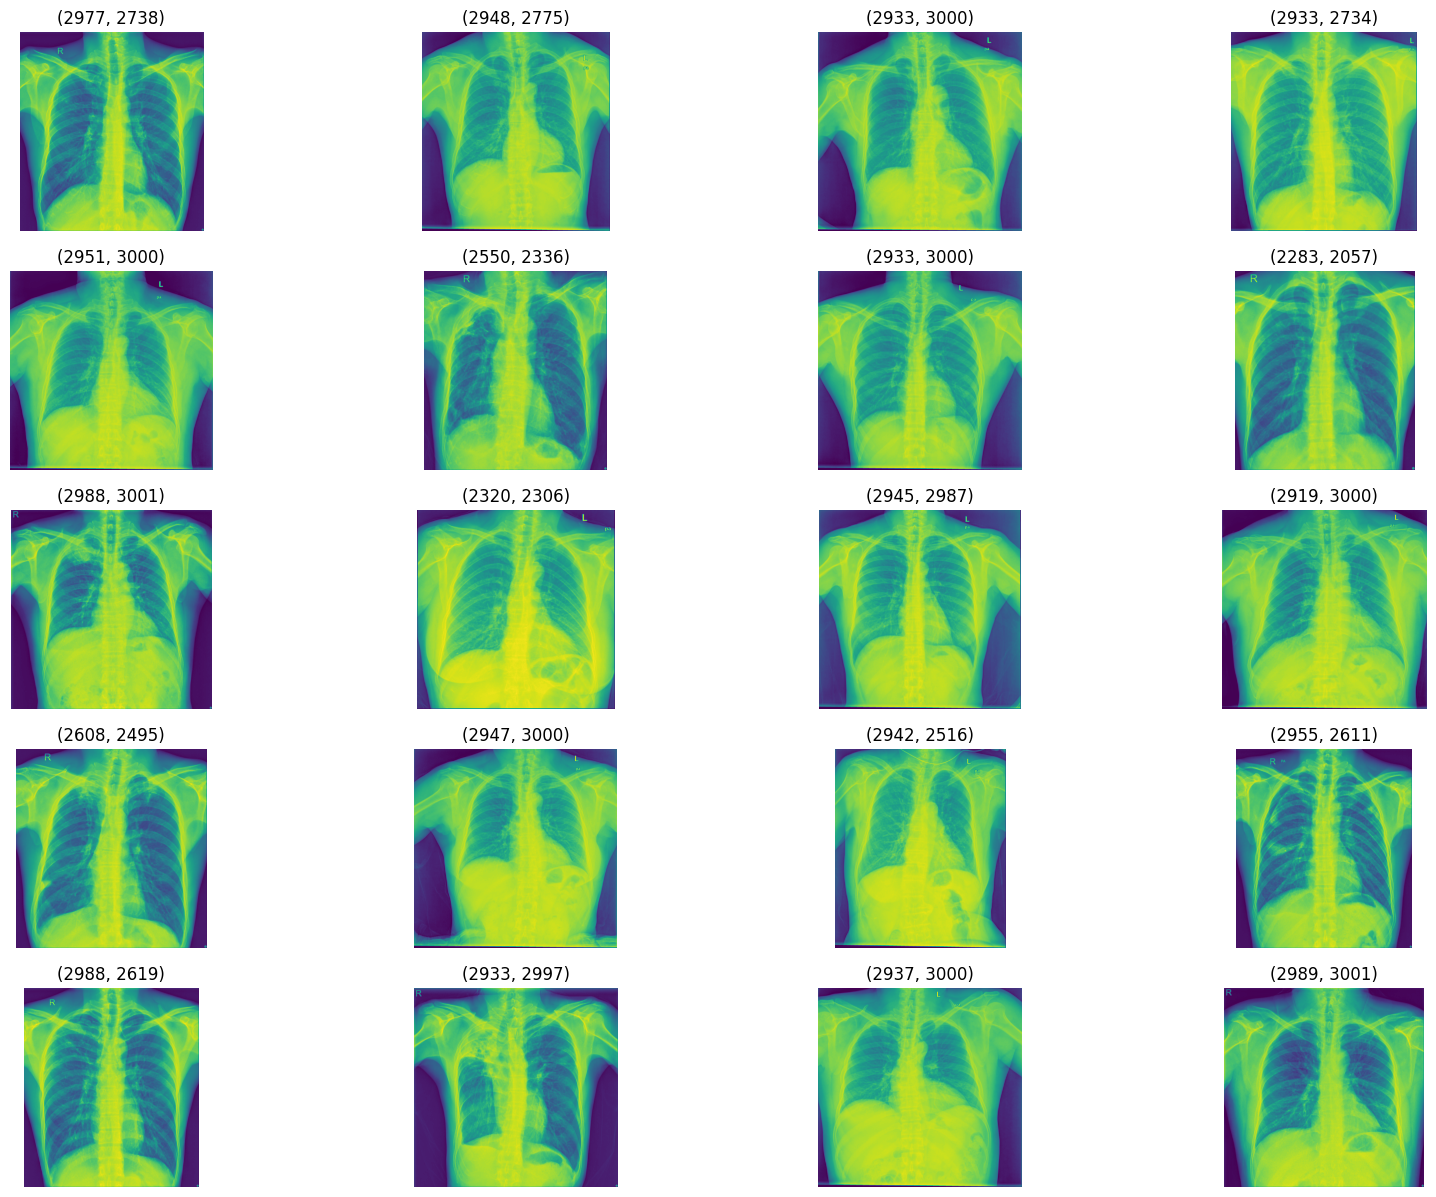

In [11]:
fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img=images_adjusted[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(img.shape)

Nice! Our images are now all 2-tensors instead of 3-tensors. Note that you can display the images with [other colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html):

Text(0.5, 1.0, 'Cool')

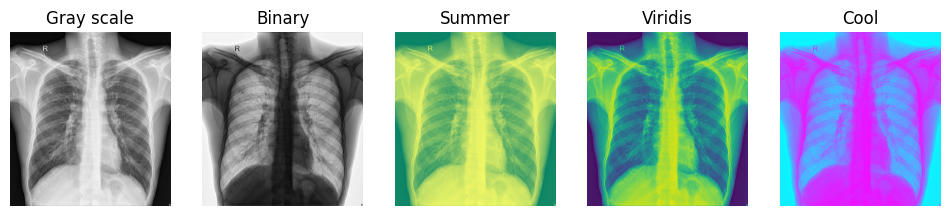

In [12]:
fig = plt.figure(figsize=(12, 12))
rows = 1
columns = 5

fig.add_subplot(rows, columns, 1)
img=images_adjusted[0]
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Gray scale")

fig.add_subplot(rows, columns, 2)
img=images_adjusted[0]
plt.imshow(img,cmap="binary")
plt.axis('off')
plt.title("Binary")

fig.add_subplot(rows, columns, 3)
img=images_adjusted[0]
plt.imshow(img,cmap="summer")
plt.axis('off')
plt.title("Summer")

fig.add_subplot(rows, columns, 4)
img=images_adjusted[0]
plt.imshow(img,cmap="viridis")
plt.axis('off')
plt.title("Viridis")

fig.add_subplot(rows, columns, 5)
img=images_adjusted[0]
plt.imshow(img,cmap="cool")
plt.axis('off')
plt.title("Cool")

Now let's resize our images!

In [13]:
resized_images=[]
for i in range(20):
    img=np.resize(images_adjusted[i],(2300,2300))
    resized_images.append(img)
resized_images_array = np.array(resized_images)
resized_images_array.shape

(20, 2300, 2300)

Mission accomplished! The shape seems right (20 images that are each 2300 x 2300). Now one last sanity check to make sure our resized images still make sense:

In [14]:
# resized_images=[]
# fig = plt.figure(figsize=(20, 15))
# rows = 5
# columns = 4
# for i in range(20):
#     fig.add_subplot(rows, columns, i+1)
#     img=resized_images_array[i]
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(img.shape)

Whoops! That did NOT work. It is important to always have **check points** where you **manually** look at some of your data points to make that your image modifications are not doing anything unexpected.\
What if we tried **cropping** our images?

In [15]:
height=[]
width=[]
for i in range(20):
    img=images_adjusted[i]
    height.append(img.shape[0])
    width.append(img.shape[1])
print(f'Smallest image height: {min(height)}')
print(f'Smallest image width: {min(width)}')

Smallest image height: 2283
Smallest image width: 2057


In [16]:
trimmed_images=[]
for i in range(20):
    img=images_adjusted[i]
    img_trim=img[0:min(height),0:min(width)]
    trimmed_images.append(img_trim)
trimmed_images_array = np.array(trimmed_images)
trimmed_images_array.shape

(20, 2283, 2057)

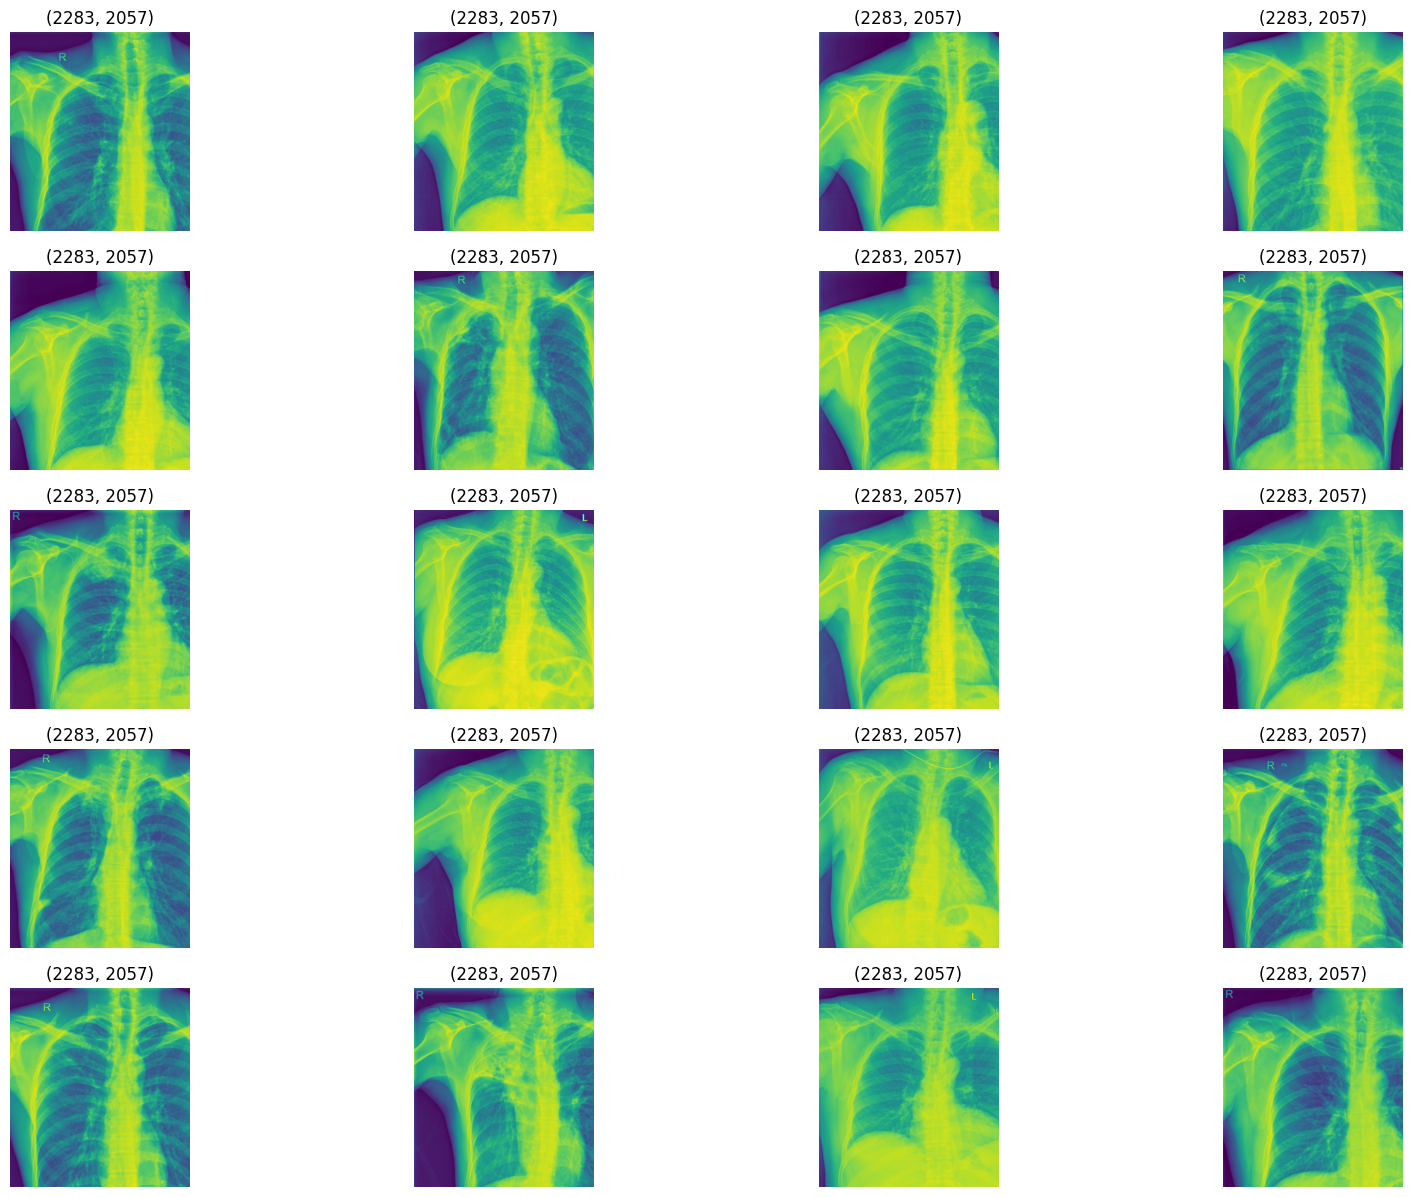

In [17]:
fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img=trimmed_images_array[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(img.shape)

It worked! However, now you cropped out a huge portion of the lungs in some patients. Thus, the cropping solution was definitely not perfect either. What if we tried another one of the many available 2D image processing packages?

## 3. Experimenting with Pillow (PIL)

In [18]:
!cd data_png
!mkdir adjusted_images

In [19]:
!ls

CSV_preparation.ipynb
CSV_preparation_mini_assignment_answers.ipynb
PNG_preparation.ipynb
PNG_preparation_mini_assignment_answers.ipynb
README.md
adjusted_images
data_csv
data_png
requirements.txt
runtime.txt


Save our adjusted (ie 1-tensor) images into a new directory, since PIL seems to work better when it reads in images directly:

In [20]:
import matplotlib

for i in range(20):
    img = images_adjusted[i]
    matplotlib.image.imsave(f'adjusted_images/img_{i}.png', img) 

In [21]:
from PIL import Image

Let's read in and display our adjusted .png files, as well as their dimensions:

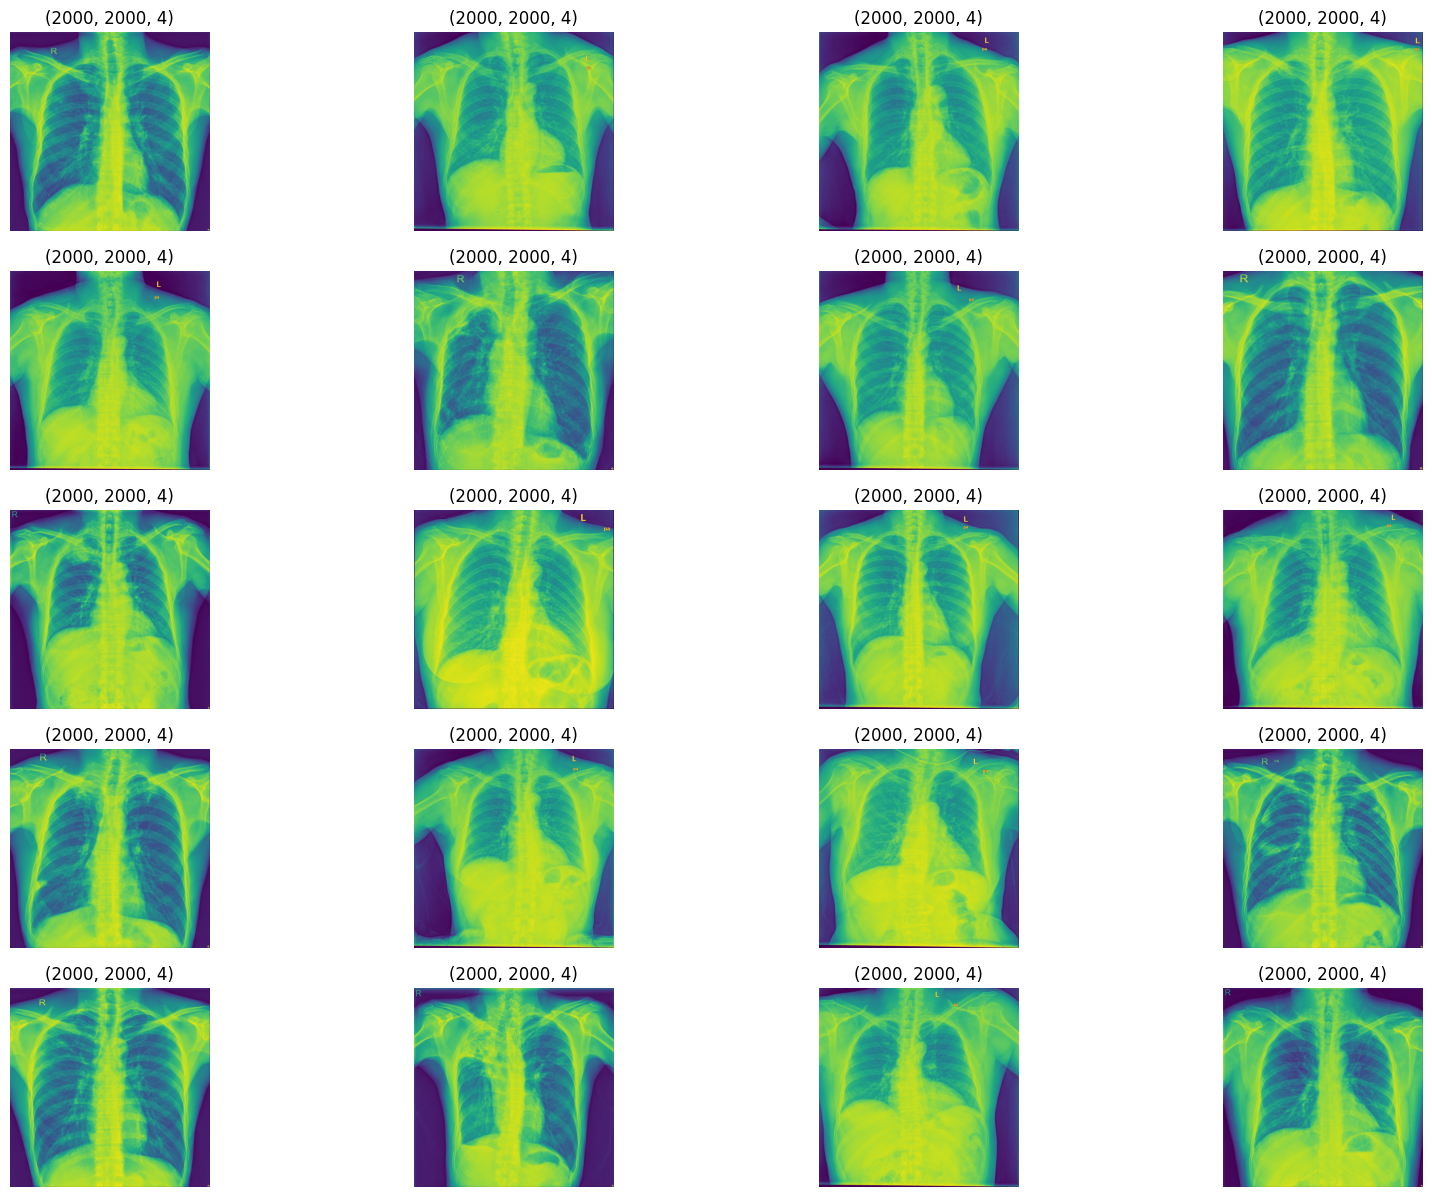

In [22]:
resize_images_PIL=[]

fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4

for i in range(20):
    image = Image.open(f'adjusted_images/img_{i}.png')
    new_image = image.resize((2000, 2000))
    new_images_array=np.array(new_image)
    resize_images_PIL.append(new_images_array)
    
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(new_image)
    plt.axis('off')
    plt.title(new_images_array.shape)

Why 4 channels? Because we saved .png files! Let's try the same thing with .jpgs:

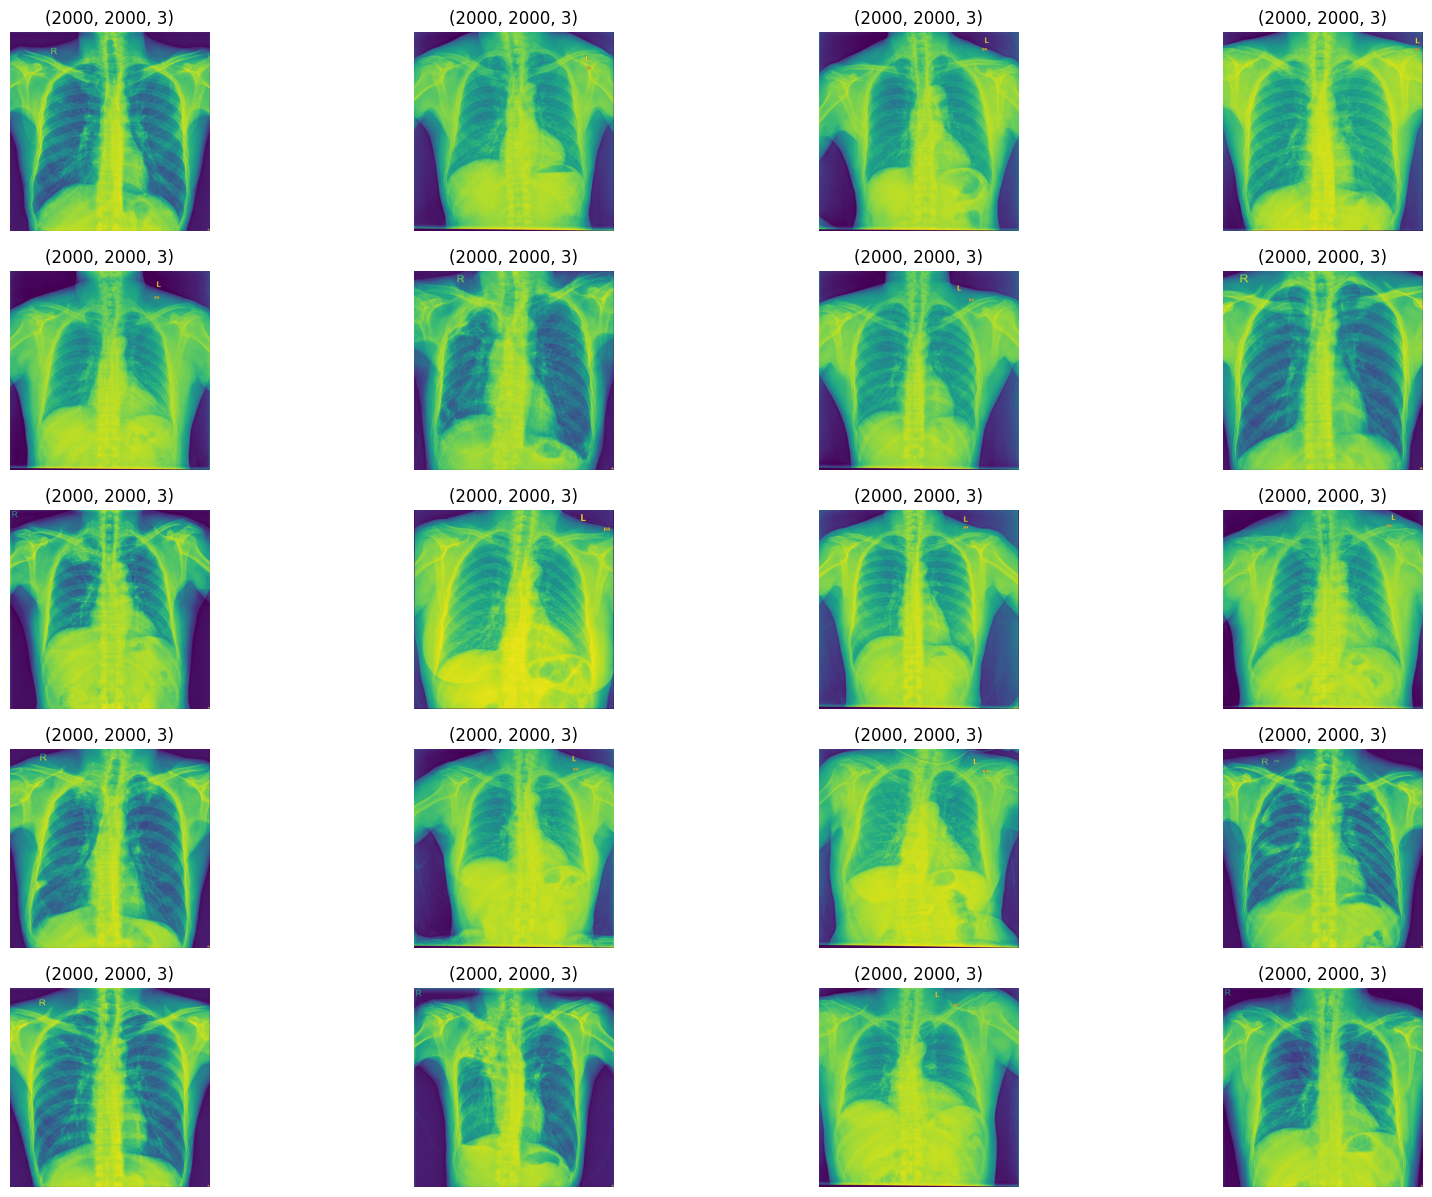

In [23]:
for i in range(20):
    img=images_adjusted[i]
    matplotlib.image.imsave(f'adjusted_images/img_{i}.jpg', img)
    
resize_images_PIL_jpg=[]

fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4

for i in range(20):
    image = Image.open(f'adjusted_images/img_{i}.jpg')
    new_image = image.resize((2000, 2000))
    new_images_array=np.array(new_image)
    resize_images_PIL_jpg.append(new_images_array)
    
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(new_image)
    plt.axis('off')
    plt.title(new_images_array.shape)

And we're back to our tensor format!

## 4. Plotting the histograms of pixel values

Plotting the histograms of the pixels values of the 1-tensor images we obtained with skimage:

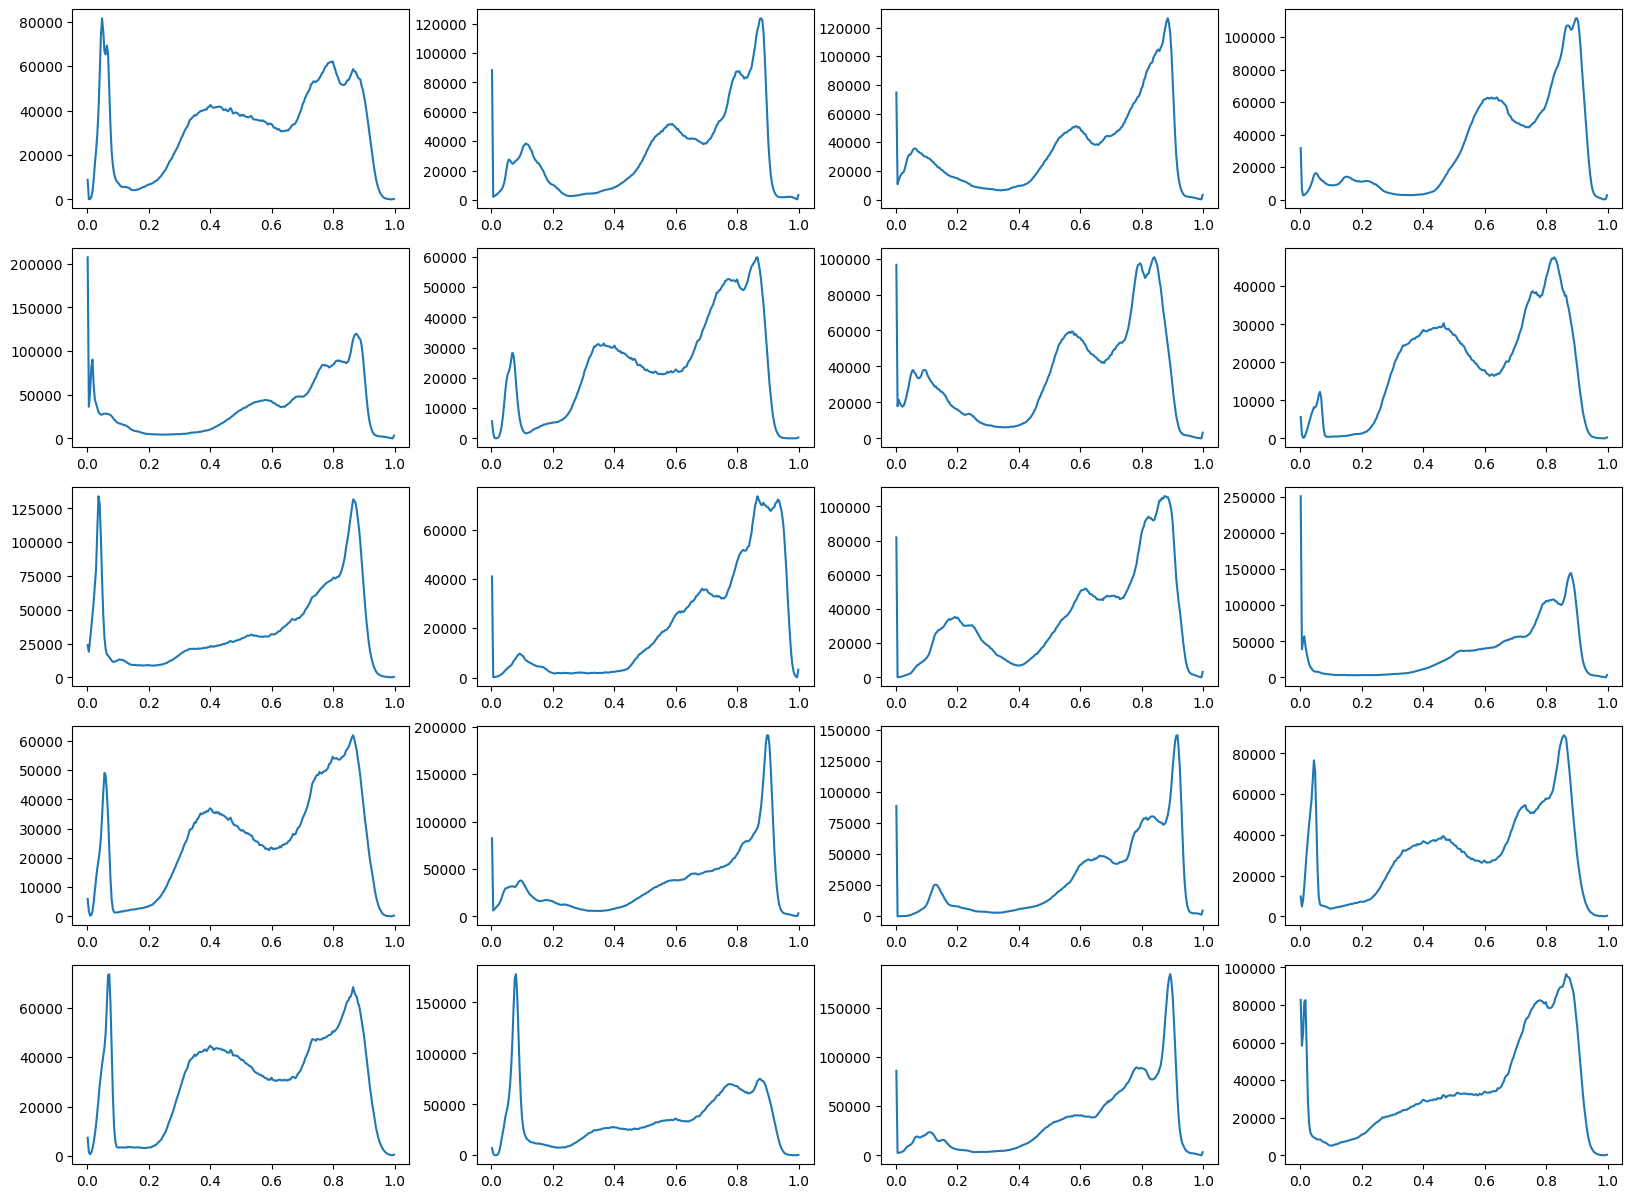

In [24]:
from skimage.exposure import histogram
fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    hist,edges=histogram(images_adjusted[i])
    plt.plot(edges,hist)

Plotting the histograms of the pixels values of the 3-tensor images we obtained with PIL:

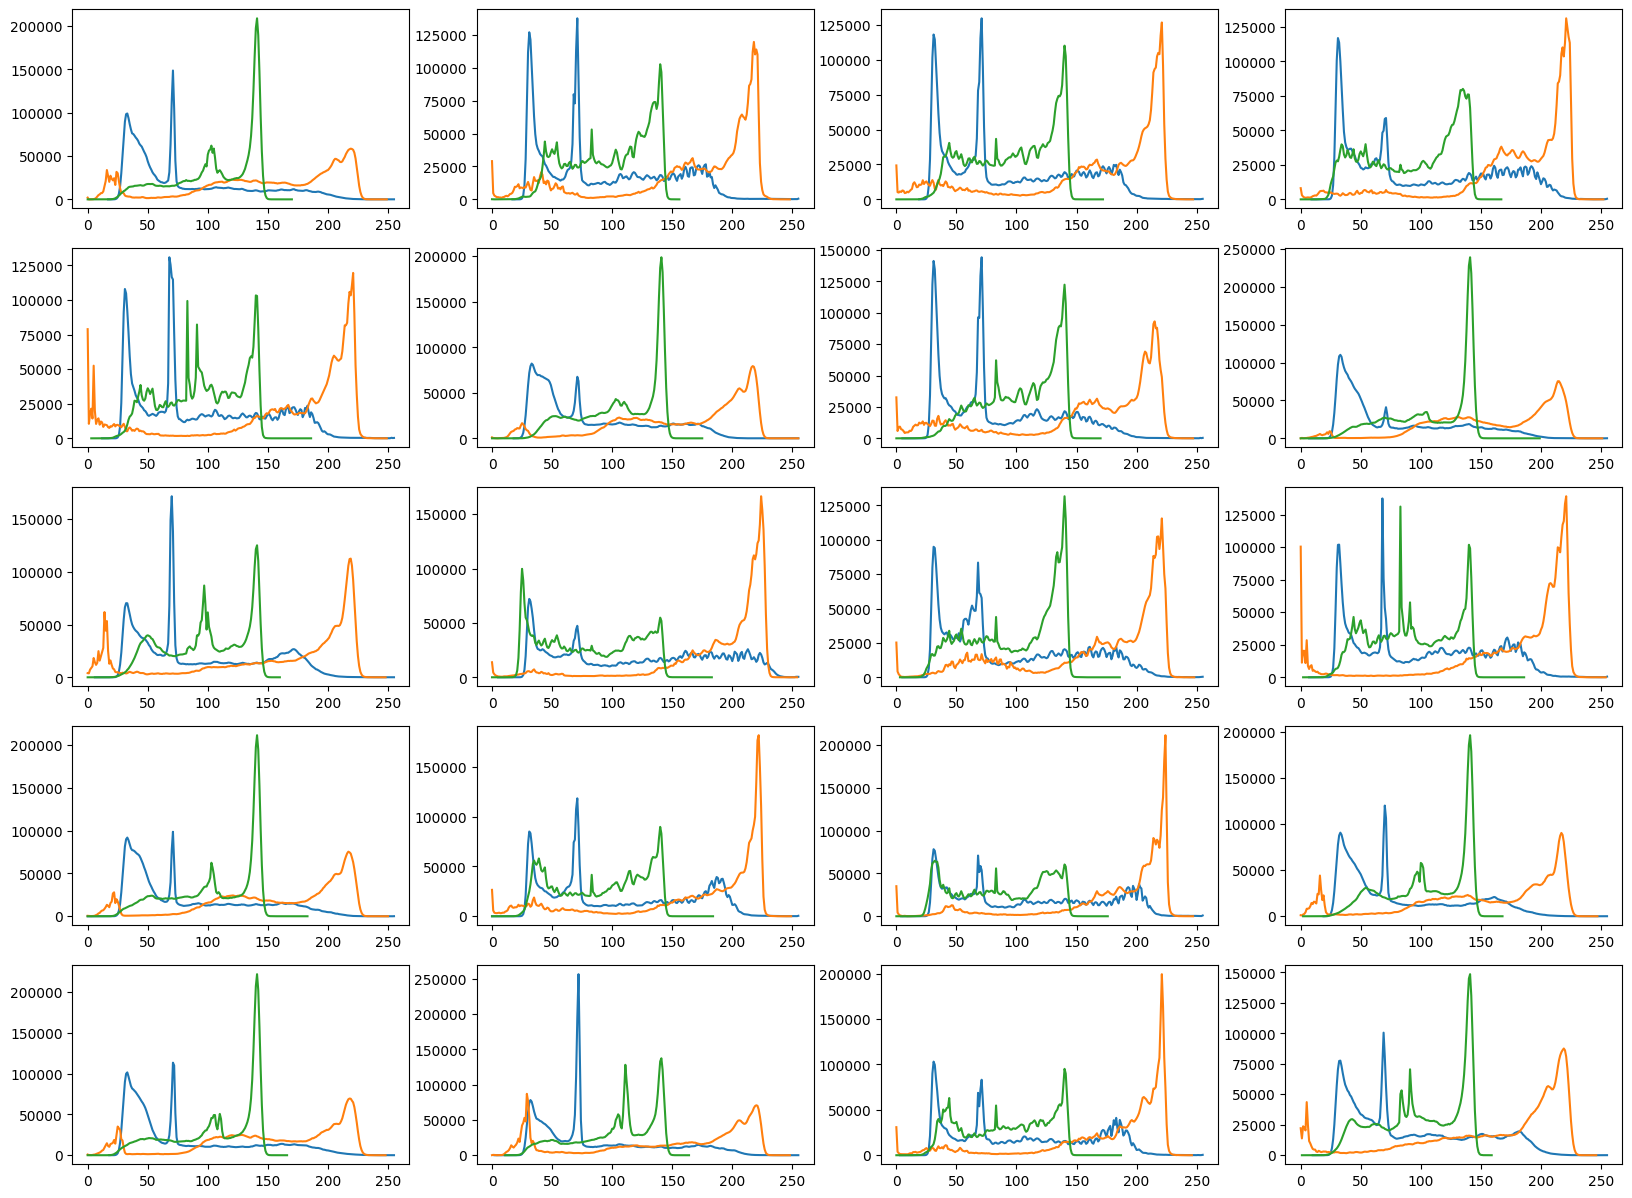

In [25]:
from skimage.exposure import histogram
fig = plt.figure(figsize=(20, 15))
rows = 5
columns = 4
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img=resize_images_PIL_jpg[i]
    hist_0,edges_0=histogram(img[:,:,0])
    hist_1,edges_1=histogram(img[:,:,1])
    hist_2,edges_2=histogram(img[:,:,2])
    plt.plot(edges_0,hist_0)
    plt.plot(edges_1,hist_1)
    plt.plot(edges_2,hist_2)

## 5. Mini assignment: feature scaling images

There are [many](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/) [different](https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/) ways to scale the pixel values in an image. You can do (a) within-channel, within-image (local) feature scaling; (b) cross-channel within-image (local) feature scaling and (c) cross-channel and cross-sample (global) feature scaling. **For the following exercise, implement a cross-channel within-image standard scaling of the 3-tensor images (recall: _resize_images_PIL_jpg_ numpy array). Then, display the new histograms and images.**

## 6. Contrast enhancement

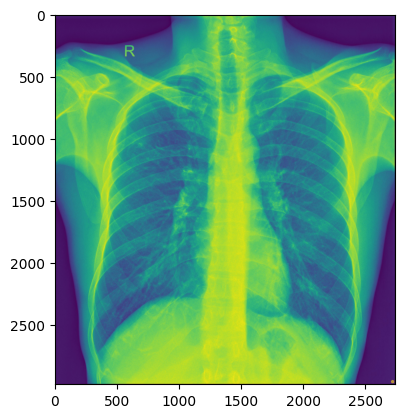

In [26]:
img = plt.imread('adjusted_images/img_0.jpg')
plt.imshow(img)

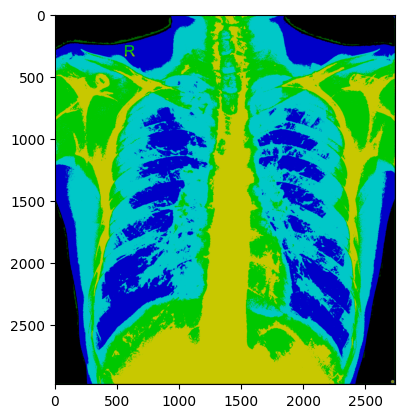

In [27]:
markers = np.zeros_like(img) # tensor of 0s that has the same shape as img

markers[img < 10] = 100 
# for pixel value in the img that has a value below 10, set the corresponding value in the tensor of 0s to 100

markers[img > 120] = 200
# for pixel value in the img that has a value above 120, set the corresponding value in the tensor of 0s to 200
plt.imshow(markers)

## 7. A brief note on segmentation

Image segmentation is one of the perennial challenges of computer vision. It is the process of assigning all of the pixels in an image that are part of some label of interest with "1", and assigning all of the other pixels a value of "0". It is a huge and fascinating field that you will learn more about when you get to convolutional neural networks (CNNs). However, segmentation can also be part of your image preprocessing, depending on the machine learning problem at hand. For instance, if the purpose of your model is to be able to output a clinical diagnosis based on an image, segmentation could potentially be of use to you.